In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import DBSCAN
import plotly.express as px
import umap.plot

# Set random seed
np.random.seed(42)

In [2]:
def cat_plot(data, cat_features):
    # Plot barplots
    fig = plt.figure(figsize=(10,20))
    gs = gridspec.GridSpec(5,2)
    ax = {}

    for ftr, i in zip(cat_features, range(len(cat_features))):
        ax[i] = fig.add_subplot(gs[i])
        ax[i] = sns.countplot(data, x=ftr)
        ax[i].set_xticklabels(ax[i].get_xticklabels()) #, rotation=40, ha="right")
        ax[i].set_xlabel(cat_features[i])
    plt.tight_layout()
    plt.show()

def num_plot(X):
    # Plot histograms
    X.hist(figsize=(20, 15))
    plt.suptitle("Histograms of the Attributes", fontsize=20)
    plt.show()

    # Plot boxplots
    X.boxplot(figsize=(6, 10))
    plt.title("Boxplot of the Attributes")
    plt.show()

    # Plot pairwise scatterplots
    sns.pairplot(X, corner=True)
    plt.suptitle("Pairwise Scatterplots", fontsize=20)
    plt.show()

    # Heatmap of cross correlations
    sns.heatmap(X.corr(numeric_only=False))
    plt.title("Heatmap")
    plt.show()

# 1. Loading the Data, Preprocessing, Initial Data Analysis

In [3]:
# Load the dataset
url_data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(url_data)
df.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

In [4]:
# Describe the dataframe
df.describe()

# Number of distinct elements per column
#df.nunique()

# Check for NaNs
#df.isnull().values.any()

Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.250000  
50%     1526.000000        816.500000    965.500000  
75%     3554.250000       3922.000000   1820.250000  
max    60869.000000      40827.000000  47943.000000

#### Attribute Information:
CHANNEL: customers' Channel - Horeca (Hotel/Restaurant/Cafe) or Retail channel (Nominal)
REGION: customers' Region - Lisnon, Oporto or Other (Nominal)
FRESH: annual spending (m.u.) on fresh products (Continuous)
MILK: annual spending (m.u.) on milk products (Continuous)
GROCERY: annual spending (m.u.)on grocery products (Continuous)
FROZEN: annual spending (m.u.)on frozen products (Continuous)
DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous)

In [5]:
# get new columns, cat and num cols
dtype = df.dtypes
cat_features = ["Channel", "Region"] #df[["Channel", "Region"]]
num_features = df.drop(columns=["Channel", "Region"]).columns.tolist()

print("Nominal features:", cat_features)
print("Numerical features:", num_features)

Nominal features: ['Channel', 'Region']
Numerical features: ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']


### Basic statistical visualisations of the data

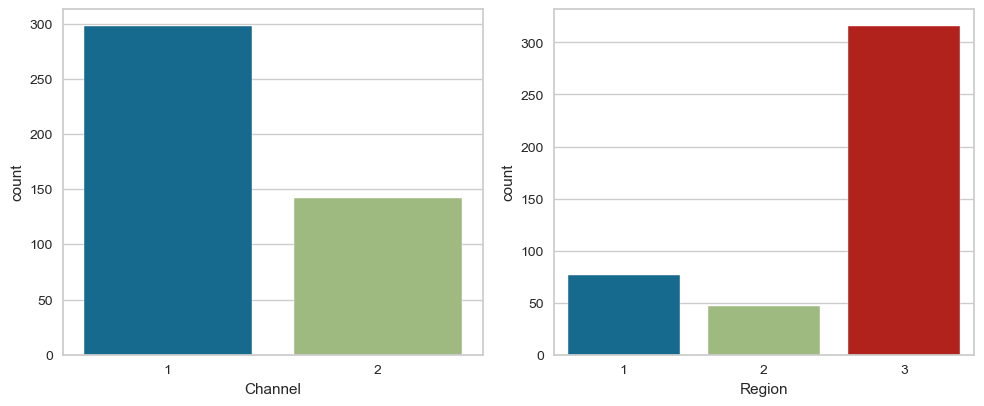

In [6]:
# Plot distributions of attributes: NOMINAL (barplots)
cat_plot(df, cat_features)

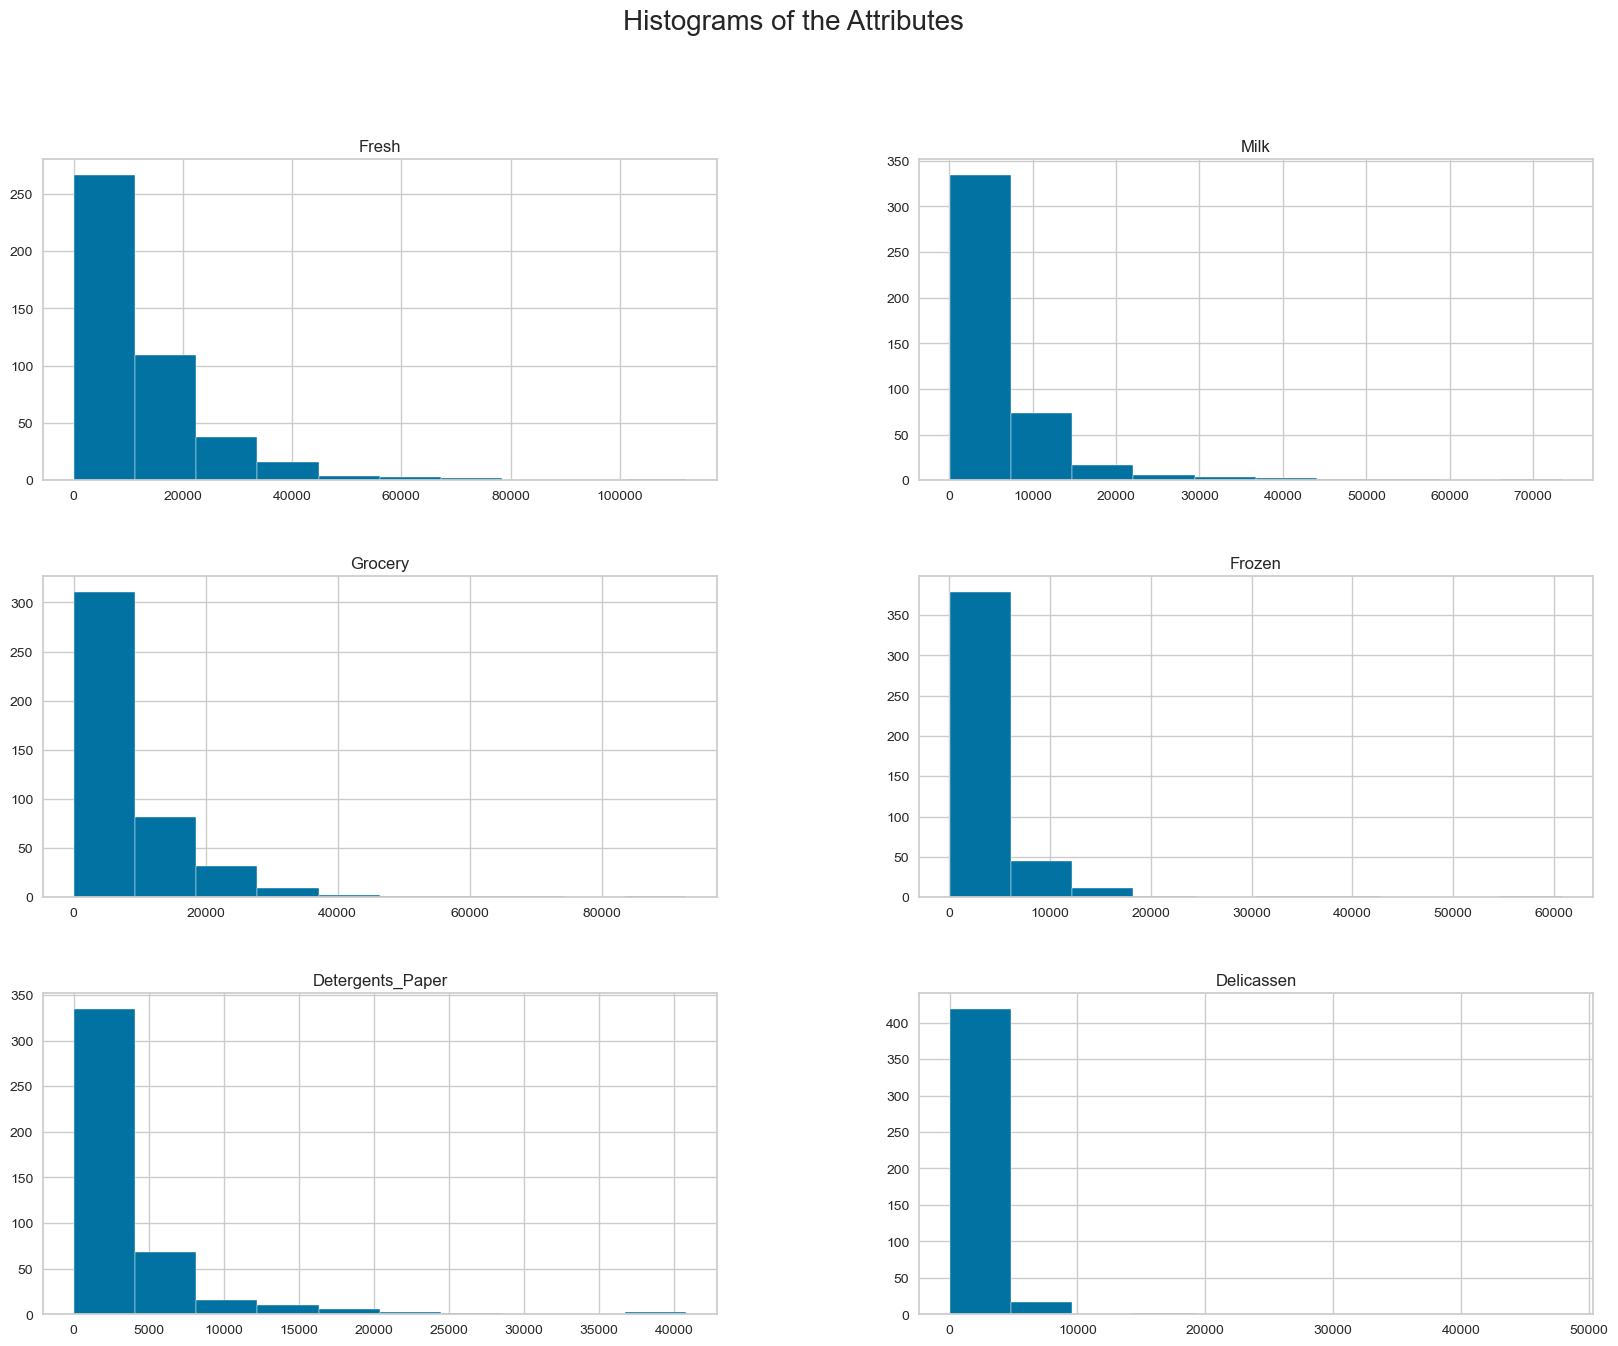

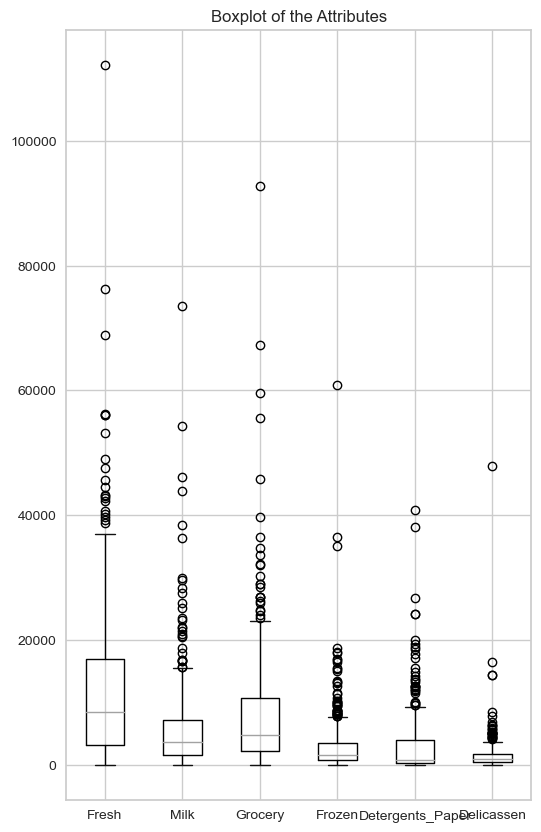

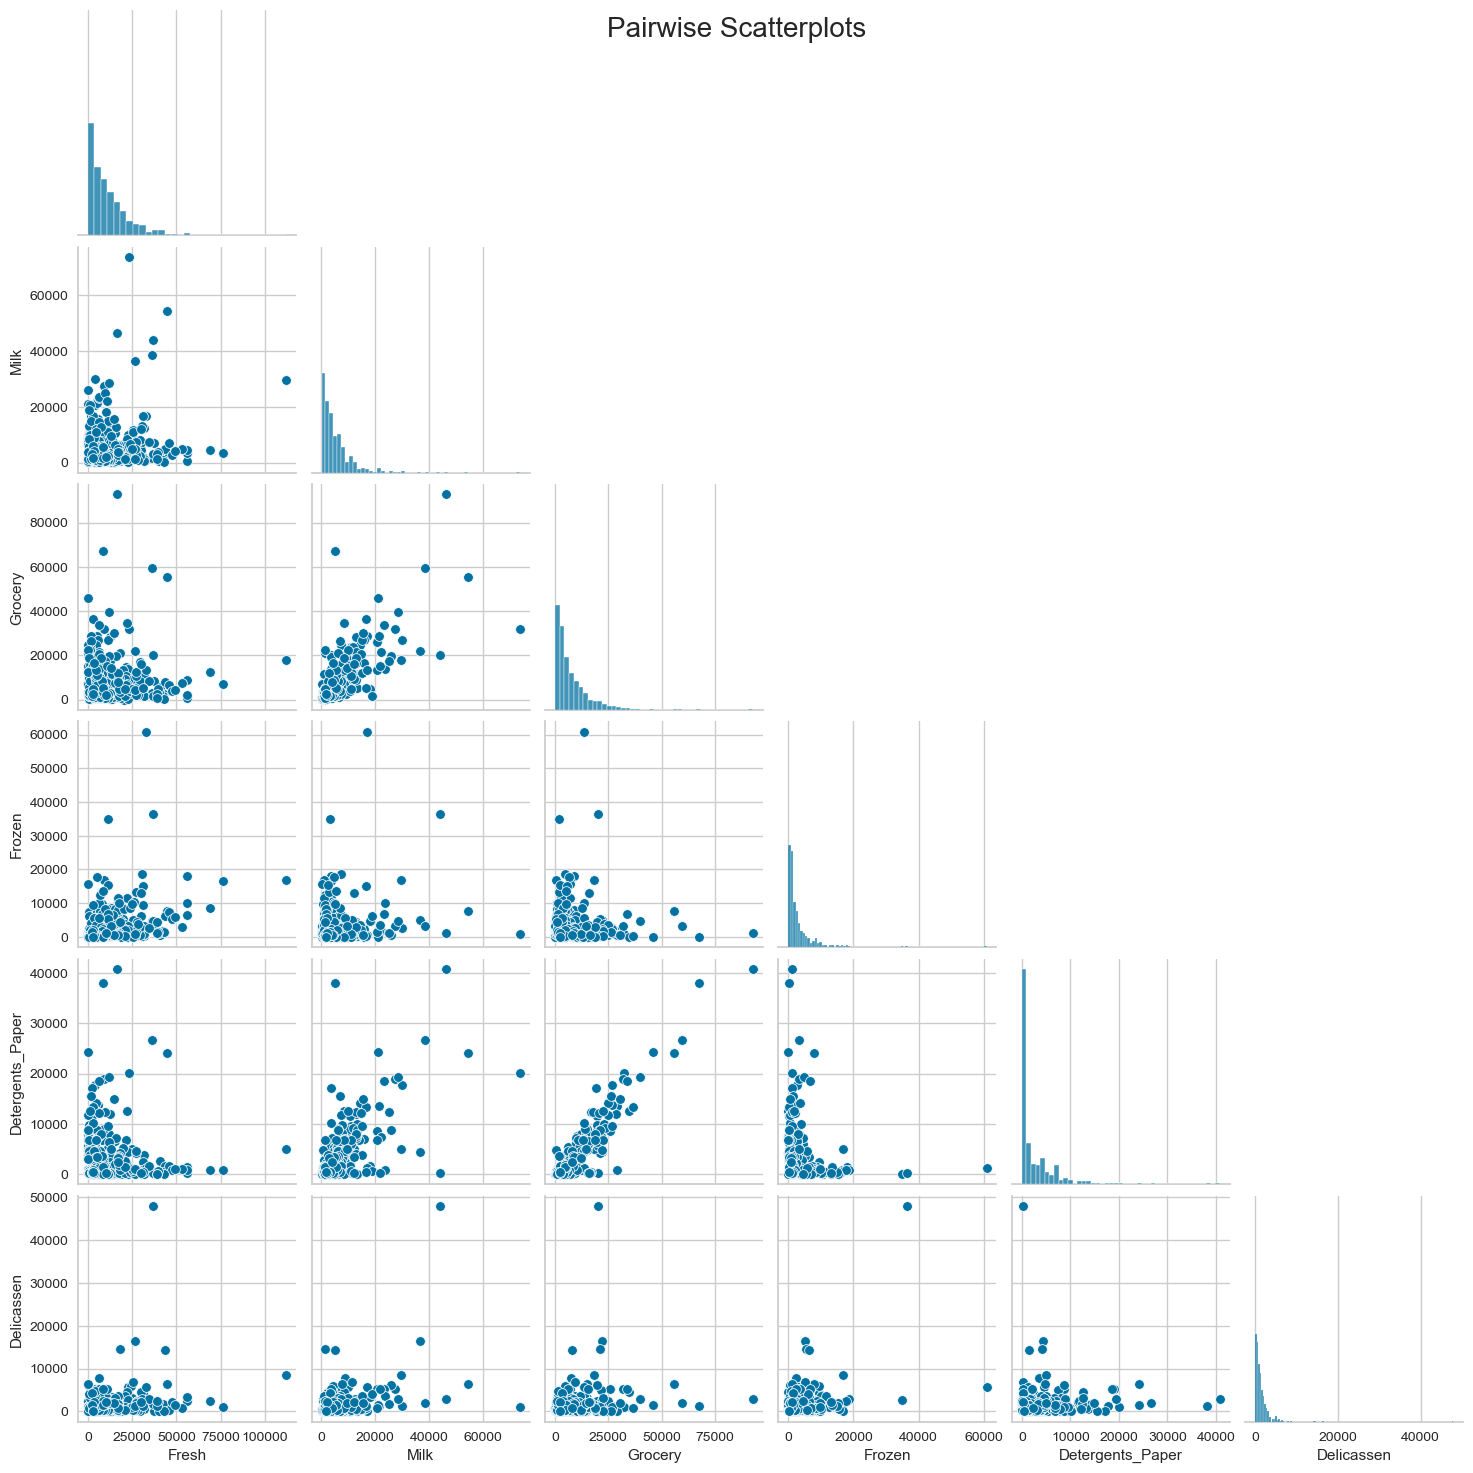

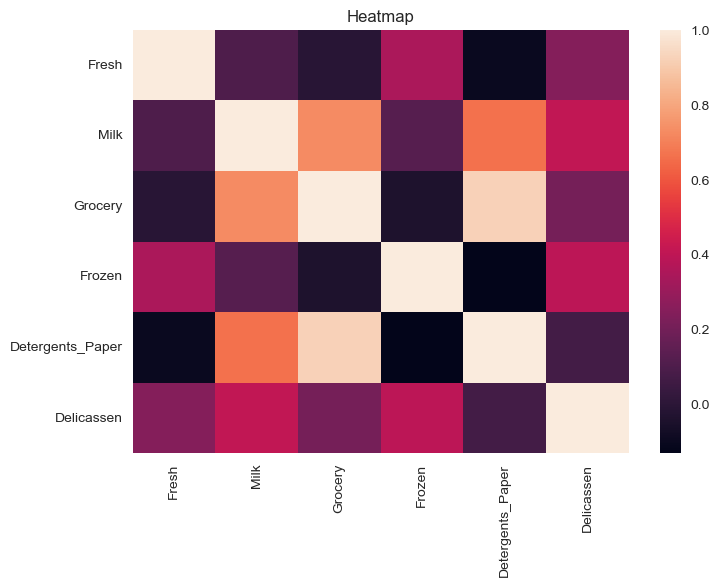

In [7]:
# Plot distributions of attributes: NUMERICAL (histograms, boxplot)
# Plot correlations (pairwise scatterplots and heatmap)
num_plot(df[num_features])

### Observation: The distributions are heavy tailed -> apply the log function to the continuous features so that the distribution becomes compressed for large values and expanded for small values

In [8]:
# Drop meta-data: Channel and the Region indicators
df_num = df.drop(columns=cat_features)

# x ← log(x + 1)
df_num = df_num.transform(lambda x: np.log(x + 1))

### Recomputed plots

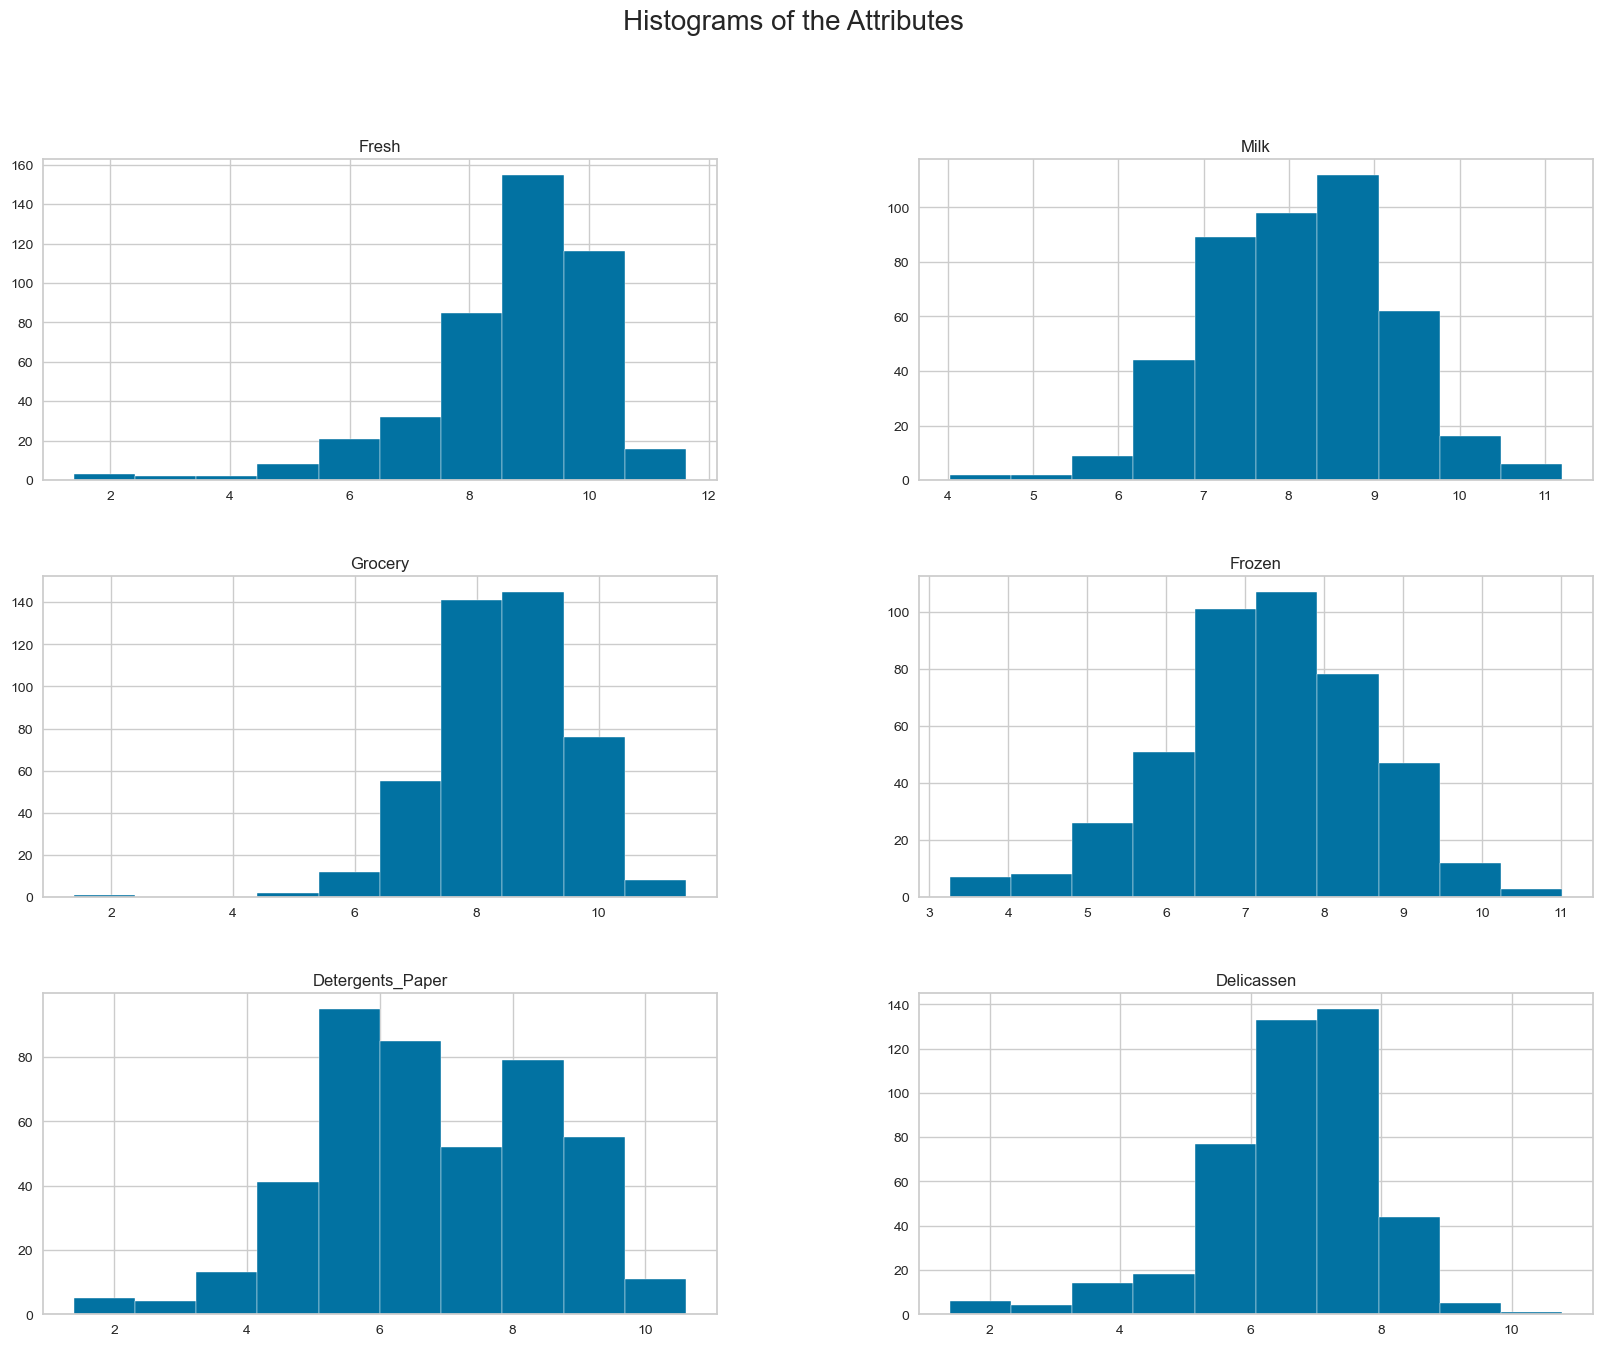

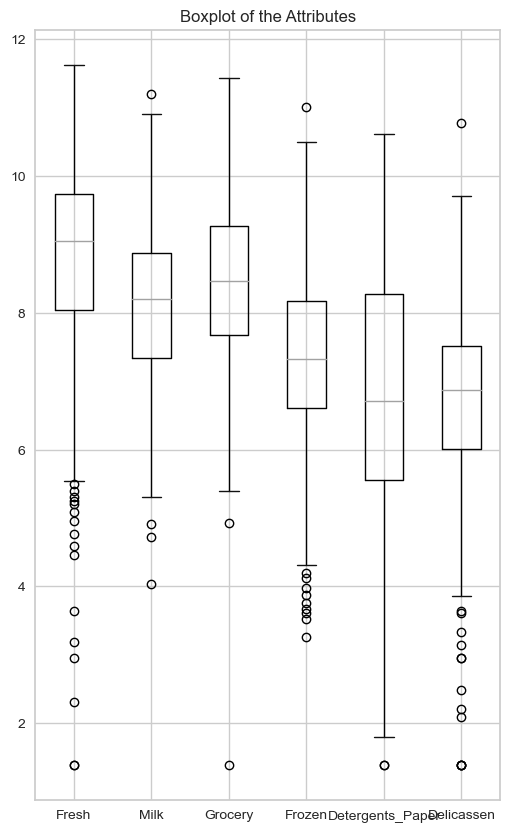

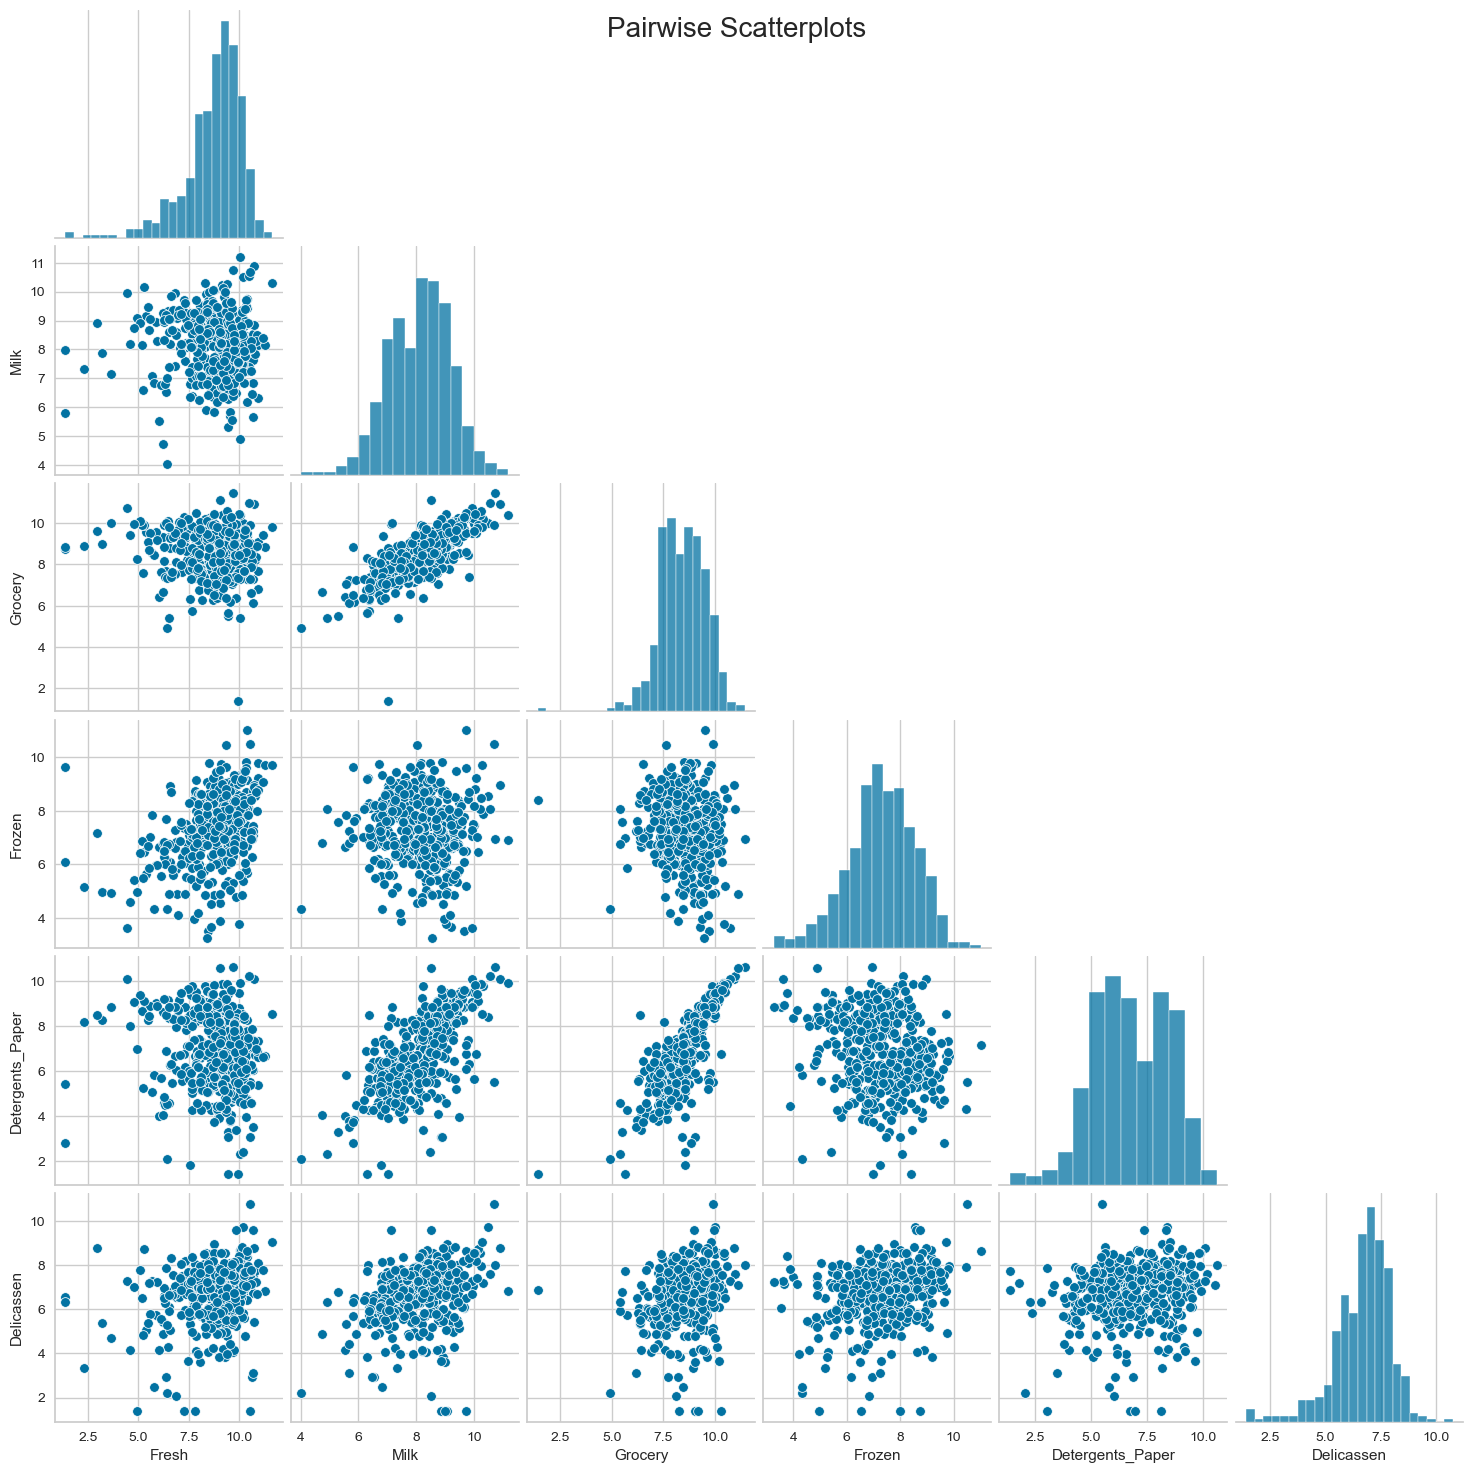

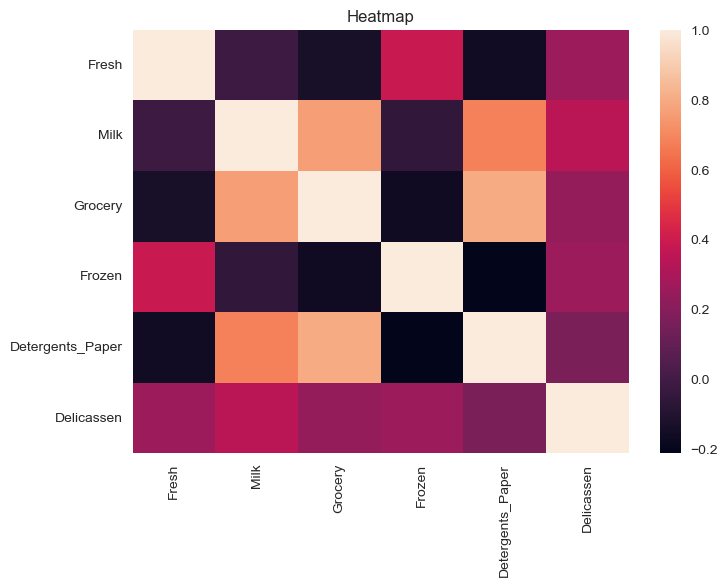

In [9]:
num_plot(df_num)

### Observation: The log transformation produces more normally distributed attributes, however the statistics can not be reliably computed (e.g. correlations). Also, some lower values can now be considered extreme, while very few higher values still possess this quality (see boxplots).

In [10]:
# Converting it into numerical tables (e.g. numpy arrays) -> Necessary?

# 2. Detecting Anomalies

# 3. Explaining Anomalies

# 4. Cluster Analysis

In [11]:
pca = PCA(n_components=3)
X = pca.fit_transform(df_num) # reduced data
print("PCA explained variance:", pca.explained_variance_.cumsum())

PCA explained variance: [4.7951204  7.78484721 9.02860498]


In [12]:
mapper = umap.UMAP(n_neighbors=4, min_dist=1, n_components=2, metric='euclidean', random_state=42) #n_neighbors=15, min_dist=0.1
u = mapper.fit_transform(X)

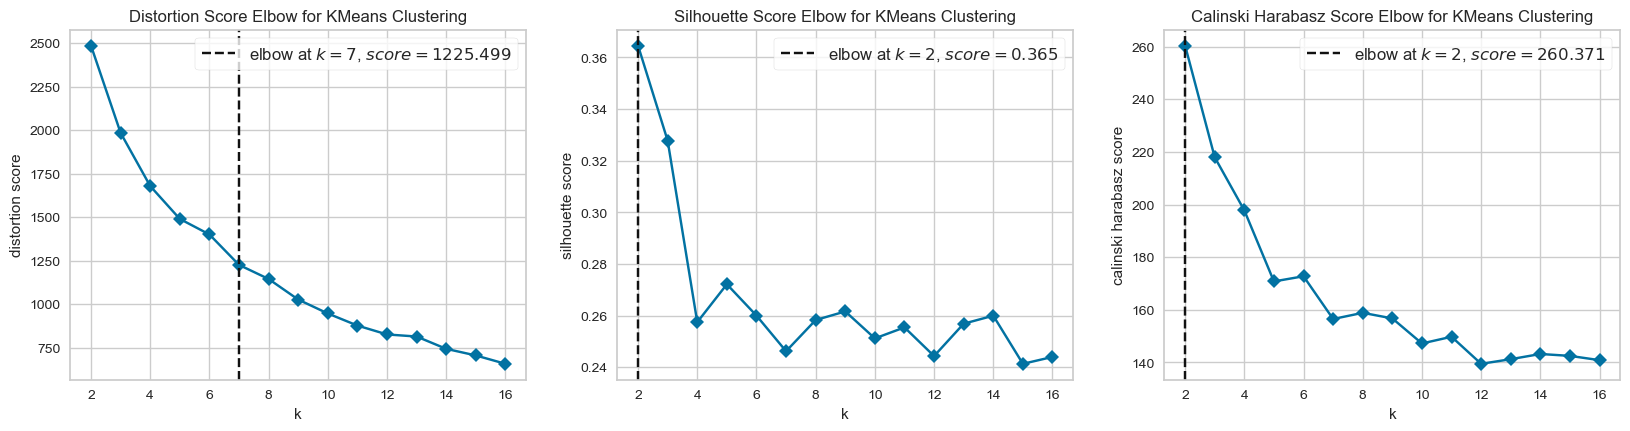

In [13]:
kmeans = KMeans(init="k-means++", n_init="auto")

fig = plt.figure(figsize=(20,10))
gs = gridspec.GridSpec(2,3)
ax = {}

for i, metr in zip(range(3), ['distortion', 'silhouette', 'calinski_harabasz']):
    ax[i] = fig.add_subplot(gs[i])
    ax[i] = visualizer = KElbowVisualizer(kmeans, k=(2,17), metric=metr, timings=False, show=True)
    visualizer.fit(X) # Fit the data to the visualizer
    visualizer.finalize() # Finalize the figure

plt.show()

For n_clusters = 2 The average silhouette_score is : 0.36380037150127786
For n_clusters = 3 The average silhouette_score is : 0.25702479002611045
For n_clusters = 4 The average silhouette_score is : 0.26905359979966337
For n_clusters = 5 The average silhouette_score is : 0.260670505364434
For n_clusters = 6 The average silhouette_score is : 0.27954901967363177
For n_clusters = 7 The average silhouette_score is : 0.25889214269920185


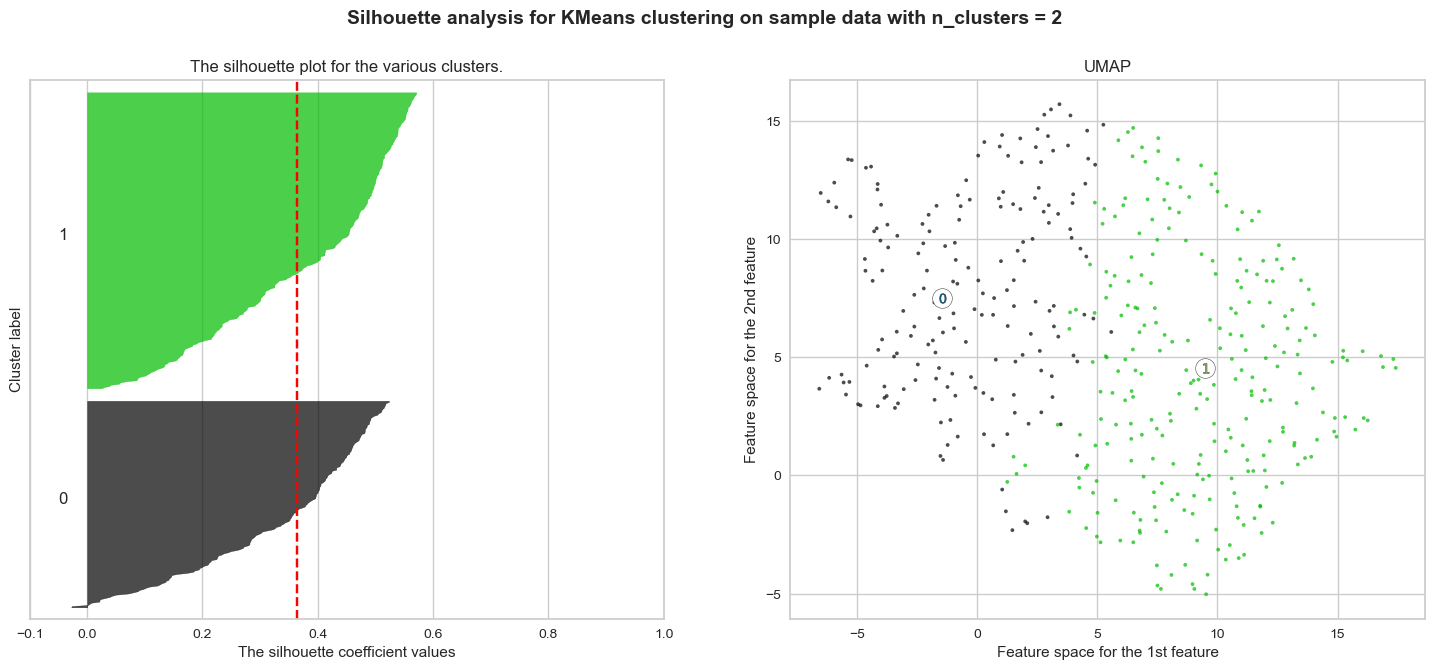

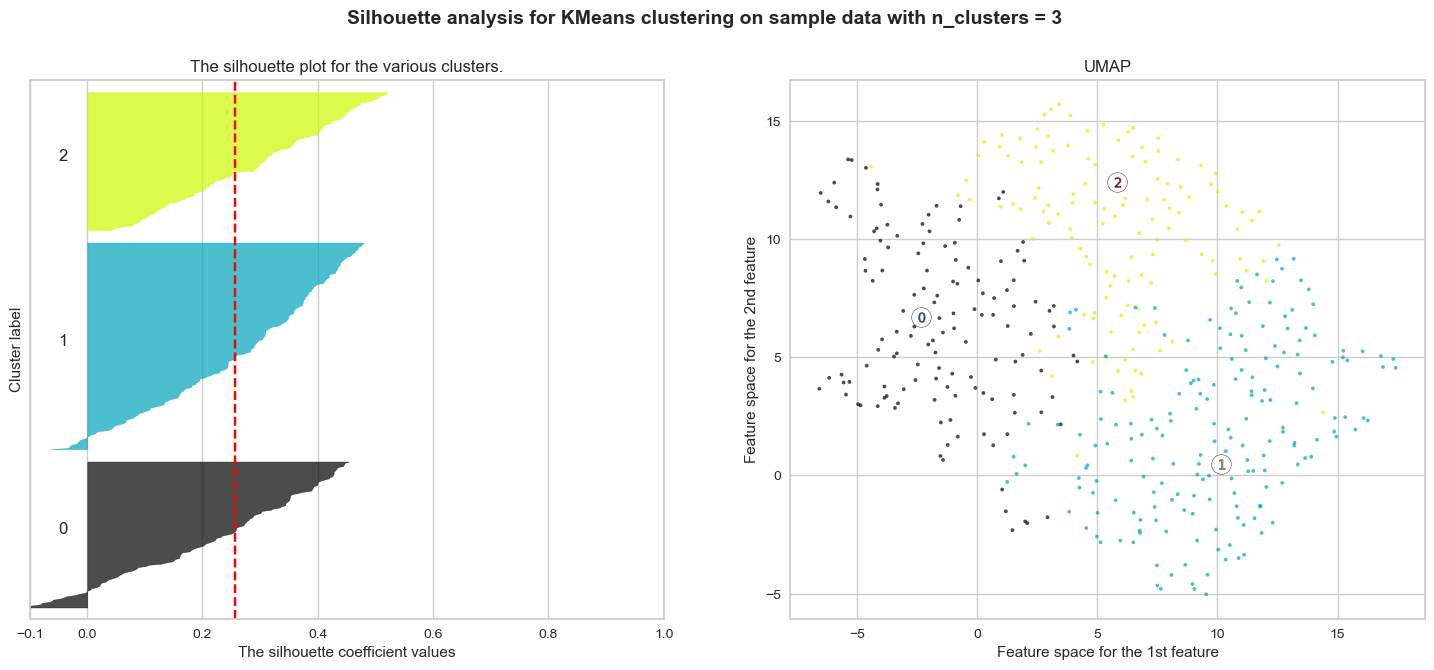

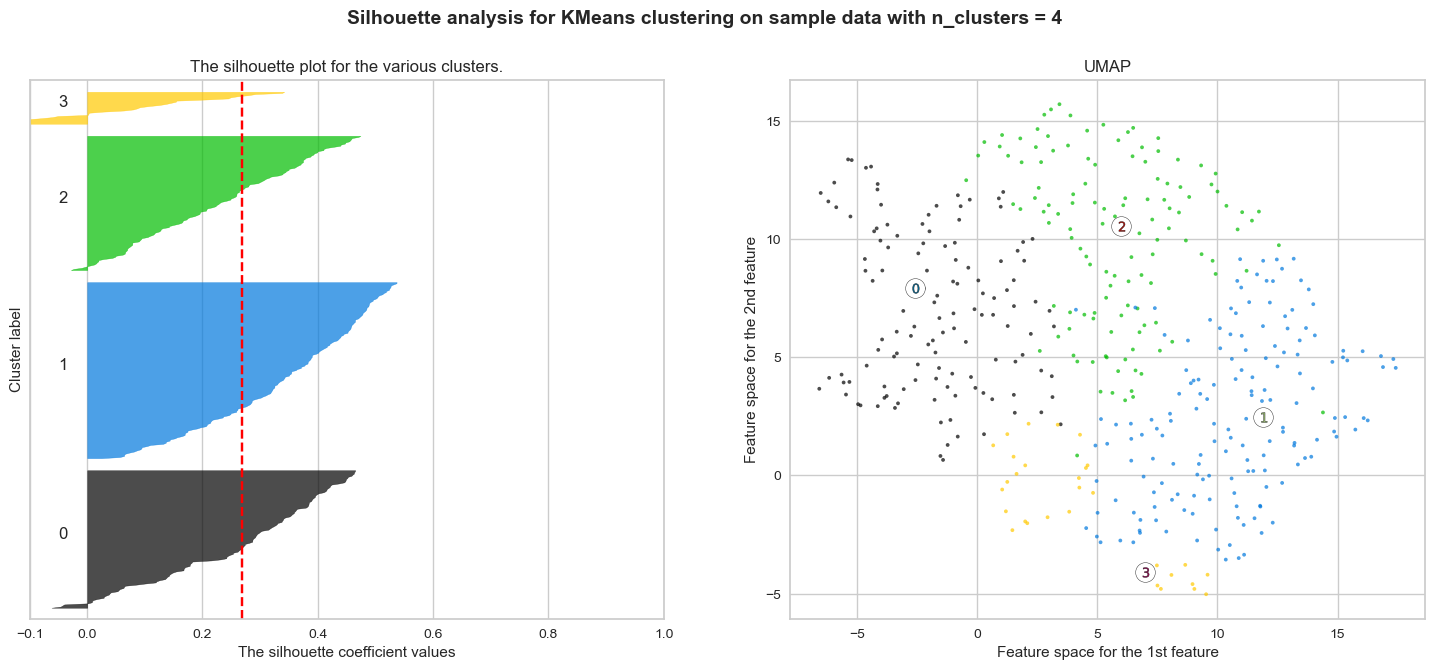

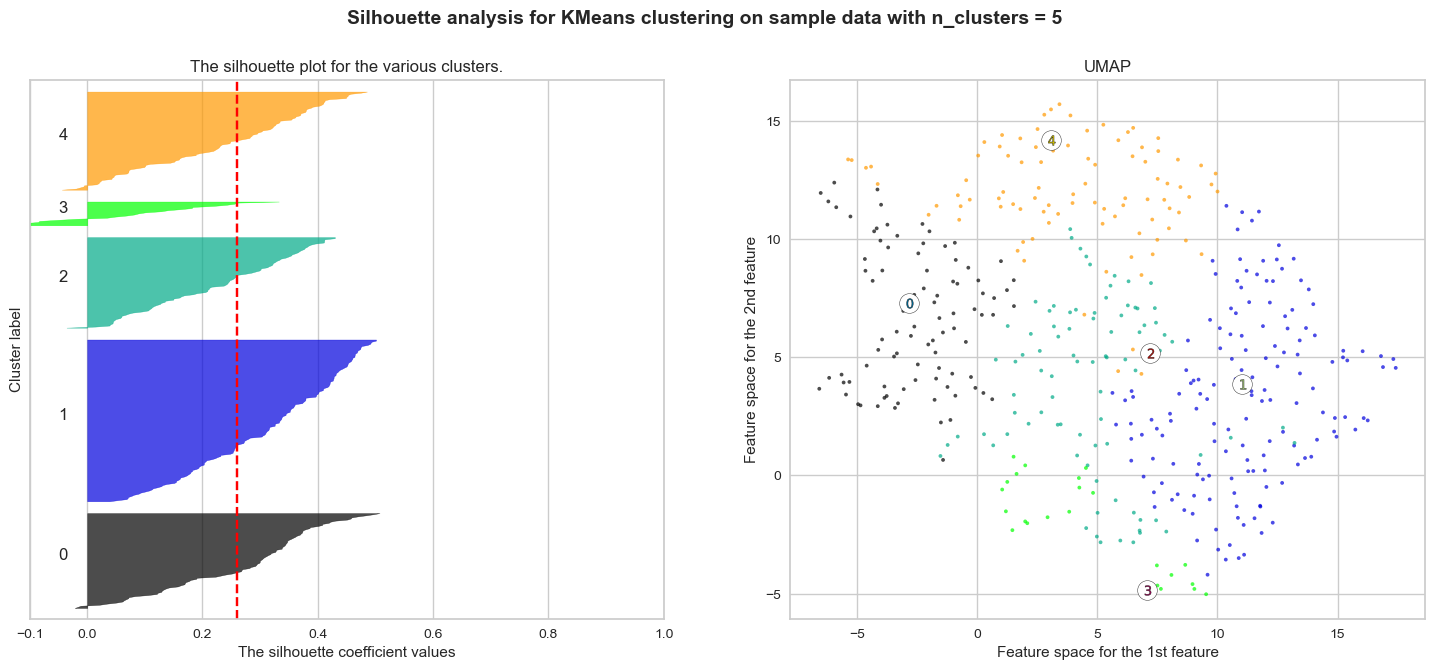

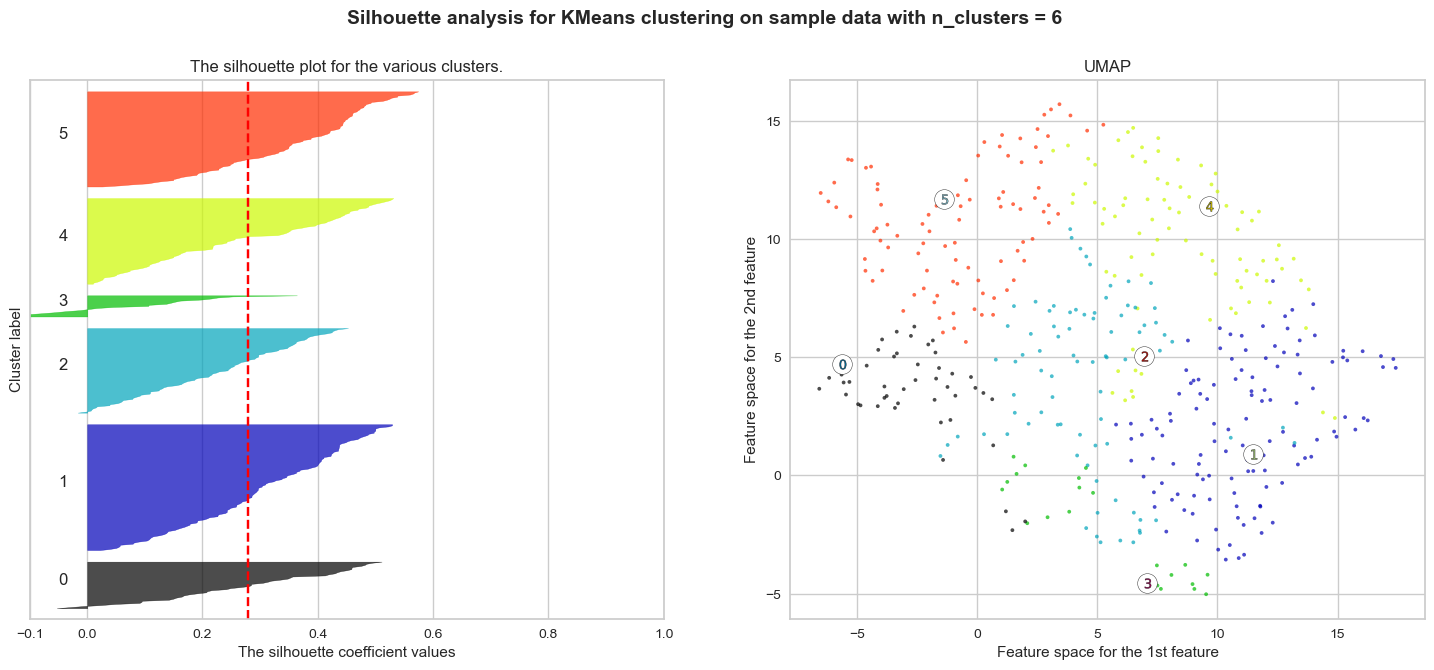

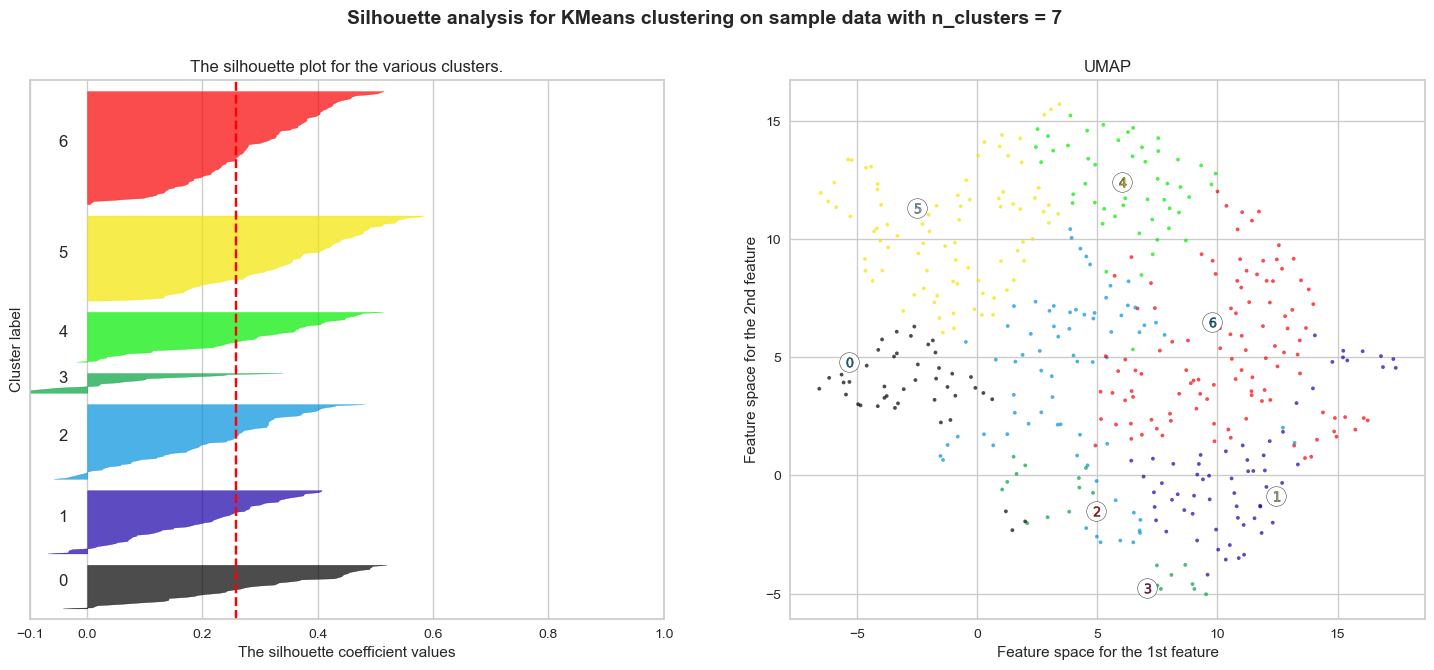

In [14]:
#https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

range_n_clusters = np.arange(2,8,1)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 0 for reproducibility.

    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', n_init = "auto", random_state=0)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

    ax2.scatter(
        u[:, 0], u[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )


    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # U-Map transformation of the cluster centers
    u_centers = mapper.transform(centers)
    # Draw white circles at cluster centers
    ax2.scatter(
        u_centers[:, 0],
        u_centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(u_centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")
###

    ax2.set_title("UMAP")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()


In [15]:
number_of_clusters = 2
kmeans = KMeans(n_clusters=number_of_clusters, init='k-means++', n_init="auto").fit(X)

dbscan = DBSCAN(eps=2, min_samples=4).fit(X) #(eps=1, min_samples=10)

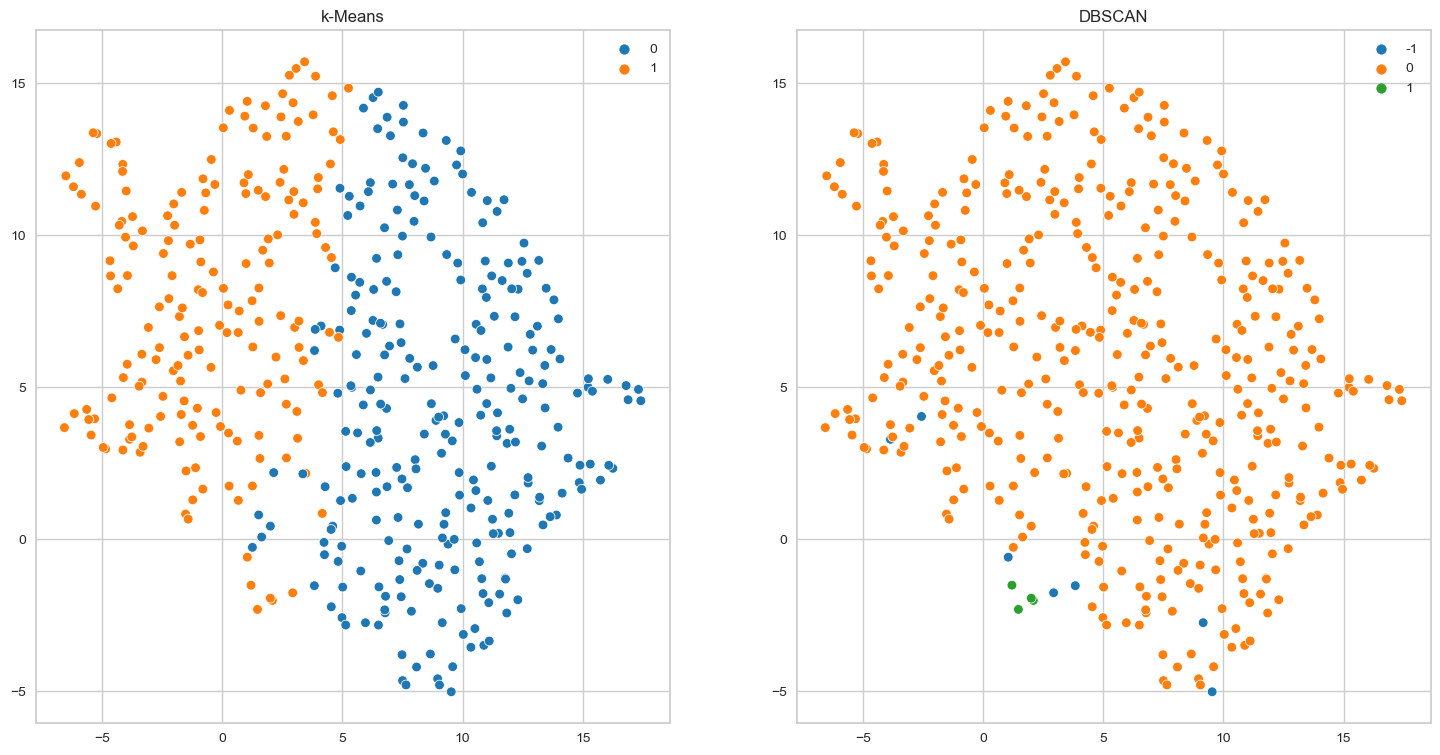

In [16]:
fig = plt.figure(figsize=(18,9))
gs = gridspec.GridSpec(1,2)
ax = {}

ax[0] = fig.add_subplot(gs[0])
ax[0] = sns.scatterplot(x=u[:,0], y=u[:,1], hue=kmeans.labels_, palette="tab10")
ax[0].set_title('k-Means')

ax[1] = fig.add_subplot(gs[1])
ax[1] = sns.scatterplot(x=u[:,0], y=u[:,1], hue=dbscan.labels_, palette="tab10") #umap.plot.points(mapper, labels=kmeans.labels_)
ax[1].set_title('DBSCAN')

plt.show()

In [17]:
print("k-Means cluster sizes:")
for cluster in set(kmeans.labels_):
    print(cluster, ":", sum(kmeans.labels_==cluster))

k-Means cluster sizes:
0 : 261
1 : 179


In [18]:
print("DBSCAN cluster sizes:")
for cluster in set(dbscan.labels_):
    print(cluster, ":", sum(dbscan.labels_==cluster))

DBSCAN cluster sizes:
0 : 429
1 : 4
-1 : 7


In [19]:
def scatterplot_clusters(df, clustering):
    plots_per_row = 2
    plots_per_column = math.ceil(len(set(clustering.labels_)) / plots_per_row)
    fig = plt.figure(figsize=(14*plots_per_row,4*plots_per_column)) #(28,28)
    gs = gridspec.GridSpec(plots_per_column, plots_per_row)
    ax = {}

    for cluster in set(clustering.labels_):
        filter = clustering.labels_ == cluster

        mean = df[filter].mean()
        sd = df[filter].std()

        ax[cluster] = fig.add_subplot(gs[cluster])
        ax[cluster] = plt.errorbar(df.columns.values.tolist(), mean, sd, marker='o', linestyle='None')
        #ax[cluster] = plt.xlabel('Feature')
        #ax[cluster].ylabel('Mean +/- SD')
        plt.title('Cluster ' + str(cluster) + ", size: " + str(sum(clustering.labels_==cluster)))
        plt.xticks(rotation=45)
    plt.show()

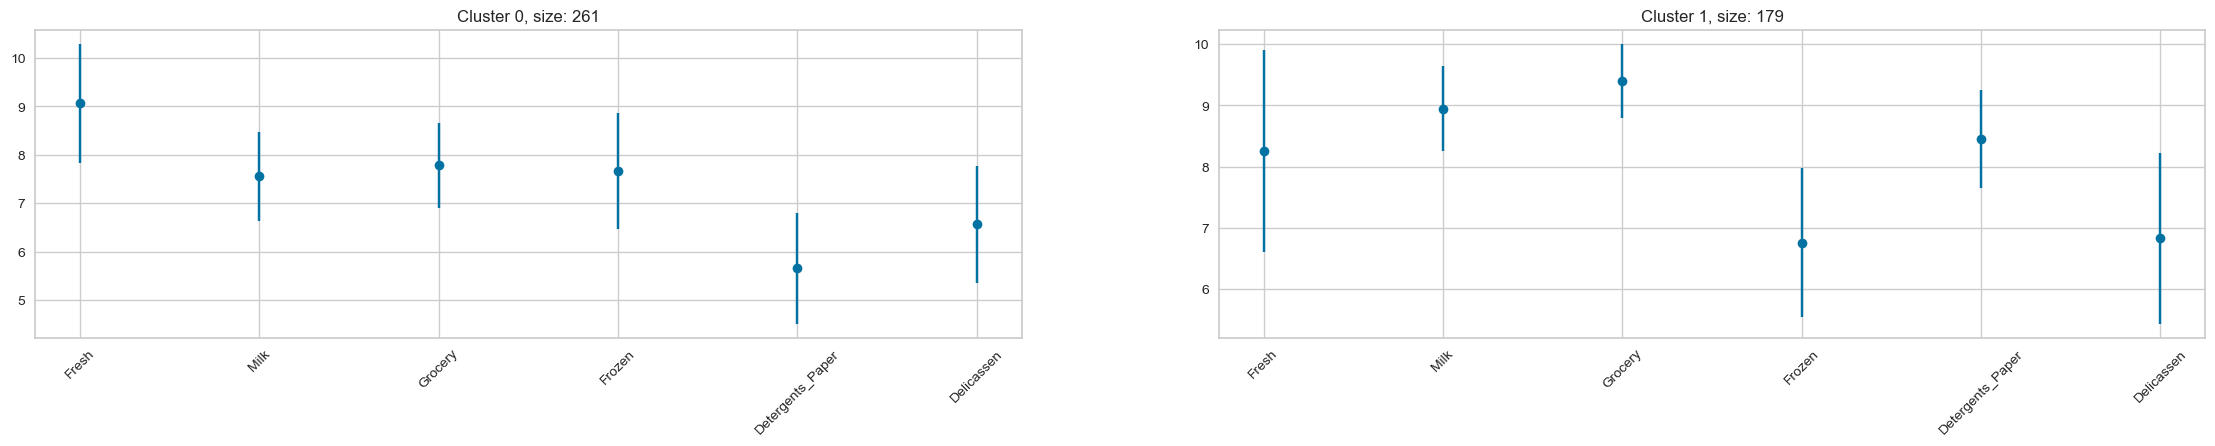

In [20]:
scatterplot_clusters(df_num, kmeans)

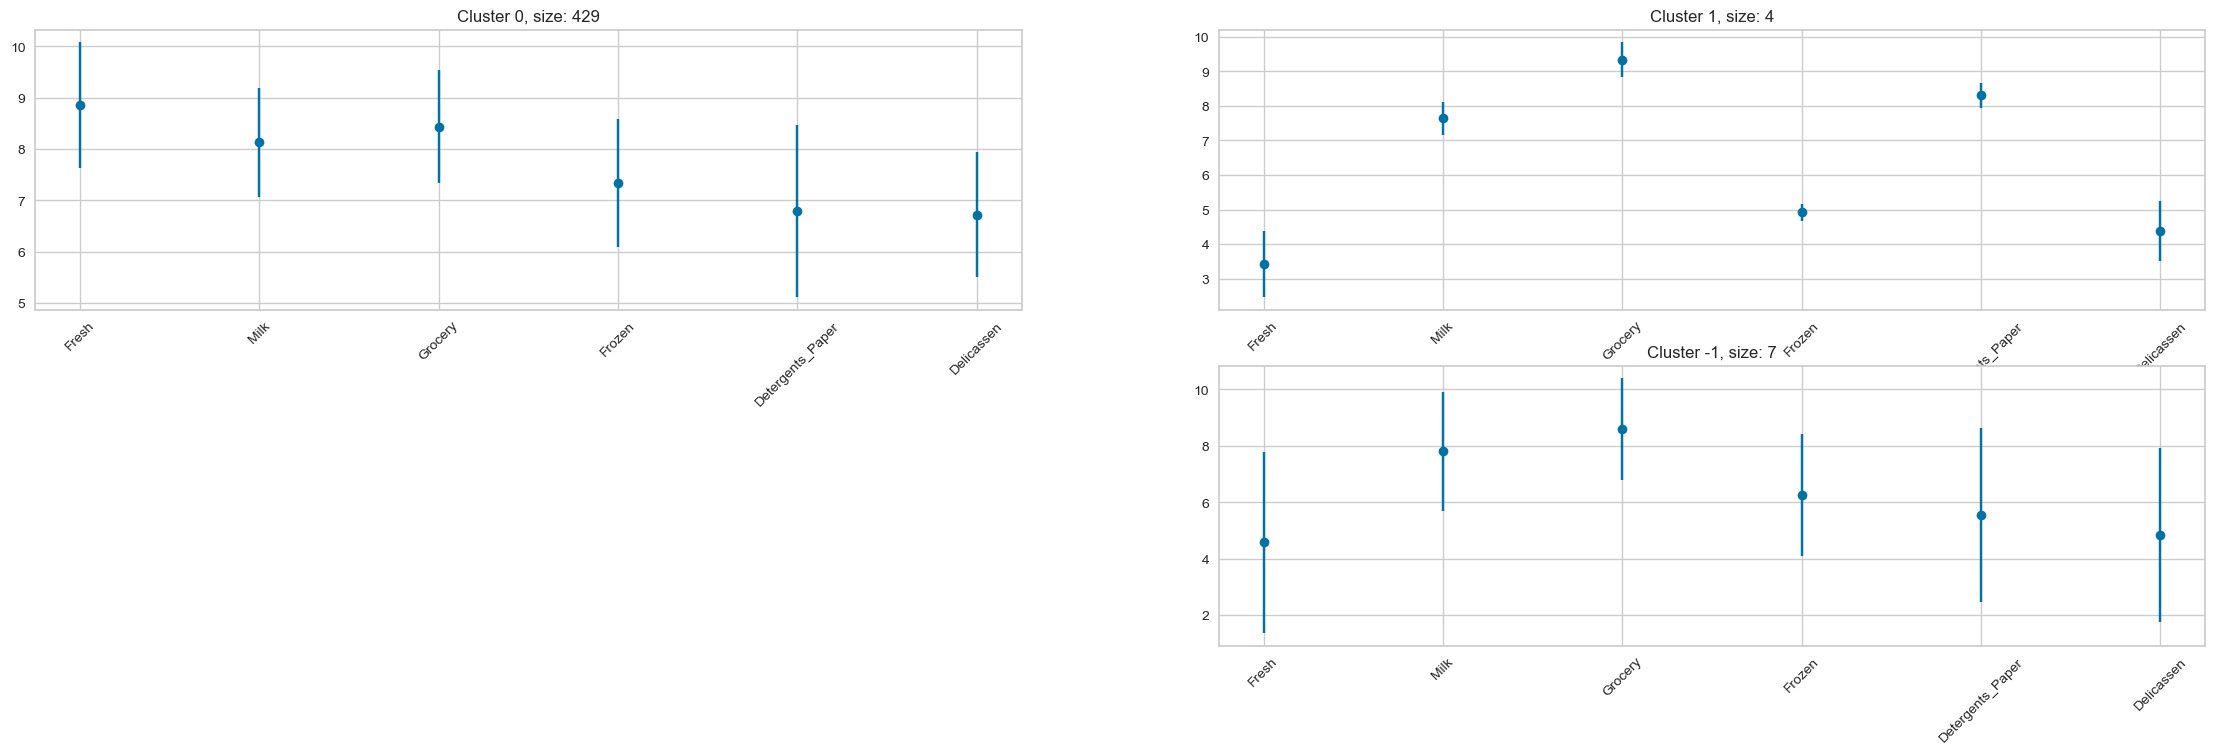

In [21]:
scatterplot_clusters(df_num, dbscan)

The average silhouette_score is : 0.44347325158834394


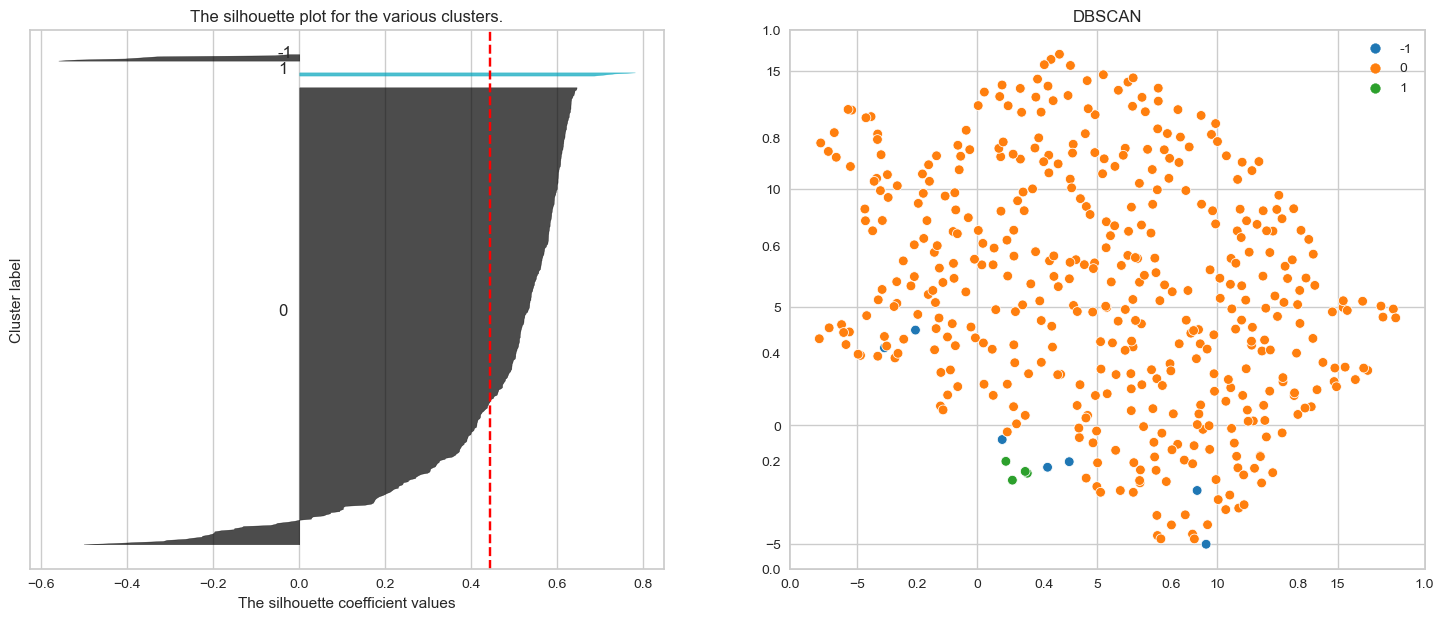

In [22]:
# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

clusterer = DBSCAN(eps=2, min_samples=4)  #(eps=0.3, min_samples=75) # (eps=0.5, min_samples=75).fit(X)
cluster_labels = clusterer.fit_predict(X)

silhouette_avg = silhouette_score(X, cluster_labels)
print("The average silhouette_score is :", silhouette_avg, )

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, cluster_labels)

y_lower = 10
for i in set(cluster_labels):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / len(set(cluster_labels)))
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
#ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

#####
#colors = cm.nipy_spectral(cluster_labels.astype(float) / len(set(cluster_labels)))
#sns.set_palette(sns.color_palette(colors))

ax2 = fig.add_subplot(gs[1])
ax2 = sns.scatterplot(x=u[:, 0], y=u[:, 1], hue=cluster_labels,
                      palette="tab10")  #umap.plot.points(mapper, labels=kmeans.labels_)
ax2.set_title('DBSCAN')

plt.show()

In [23]:
df_num.columns.values.tolist()

['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

In [24]:
features = df_num.columns.values.tolist()

fig = px.scatter_matrix(
    df_num,
    dimensions=features,
    color=kmeans.labels_,
    width=1000, height=1000
)
fig.update_traces(diagonal_visible=False)
#fig.write_html("plotly.html")
fig.show()